In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
#nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('output_lower.csv')
data.head(10)

,rating,review
0,__label__5,jeg elsker zaladnozalando har så mange forskel...
1,__label__4,handlet flere gange. gode produkter nemt at b...
2,__label__5,alt til ug. billige priser. nem returnering. s...
3,__label__2,hej betalt min regning ( troede jeg) den var å...
4,__label__5,super godt.hurtig levering og fine priser.
5,__label__2,jeg har bestilt et par sandaler ved zalando og...
6,__label__1,irriterende at få en rykker på 100 kr for mang...
7,__label__3,har køb hos zalando i mange år og har været st...
8,__label__1,synes godt nok det er for dårligt at man betal...
9,__label__1,nu har jeg oplevet flere gange hvor jeg bestil...


In [3]:
data['processed_text'] = data['review']

In [4]:
import fasttext

model = fasttext.train_supervised('output_lower.csv')
data['vec'] = data['processed_text'].apply(lambda x: model.get_sentence_vector(x))

In [5]:
# modellen kan her finde de ord der er tættes på parametret 
model.get_nearest_neighbors('dårlig')

[(0.9996375441551208, 'træstøv'),
 (0.9996375441551208, 'manual.'),
 (0.9996375441551208, 'bosch'),
 (0.9996375441551208, 'elhøvl'),
 (0.9996375441551208, 'letbrugt'),
 (0.9996375441551208, 'byggemarkedsvarer'),
 (0.9996375441551208, 'værktøj'),
 (0.9996346235275269, 'plastisk.'),
 (0.9996346235275269, 'træningstrøjen(3-4y)'),
 (0.9996346235275269, '(5-6y)')]

In [6]:
model.get_nearest_neighbors('utilfreds')

[(0.8957446813583374, ',skuffet'),
 (0.8947057127952576, 'fået'),
 (0.8945631980895996, 'står'),
 (0.8942248821258545, 'skriver'),
 (0.8938523530960083, ',snyder'),
 (0.8938523530960083, 'bæredygtigheden'),
 (0.8937193751335144, 'dages'),
 (0.8935192227363586, 'andet'),
 (0.8933439254760742, 'med….e-mail'),
 (0.8933439254760742, ',læg')]

In [7]:
model.get_nearest_neighbors('glad')

[(0.9827179908752441, 'ajour.så'),
 (0.9827179908752441, 'løsningen.'),
 (0.9827179908752441, 'unit'),
 (0.9827179908752441, 'image'),
 (0.9827179908752441, 'recourser'),
 (0.9827179908752441, 'billedenhed)'),
 (0.9826448559761047, 'fart.'),
 (0.9821840524673462, 'konkurrencedygtigt'),
 (0.9821840524673462, 'synderligt'),
 (0.9821840524673462, 'ordre...)')]

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data['vec'].values.tolist())

In [9]:
print(data['cluster'])

0       3
1       4
2       3
3       1
4       4
       ..
5059    4
5060    4
5061    3
5062    0
5063    4
Name: cluster, Length: 5064, dtype: int32


In [10]:
print(model.labels)

['__label__5', '__label__1', '__label__4', '__label__2', '__label__3']


In [11]:
clusterCount = np.bincount(data['cluster'])
print(clusterCount)
-np.sort(-clusterCount)

[ 994 2037  317 1107  609]


array([2037, 1107,  994,  609,  317])

In [12]:
data['rating'].value_counts(ascending=False)

__label__5     2694
__label__1     1664
__label__4      289
__label__2      261
__label__3      156
Name: rating, dtype: int64

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data['x'] = pca.fit_transform(data['vec'].values.tolist())[:,0]
data['y'] = pca.fit_transform(data['vec'].values.tolist())[:,1]
data['z'] = pca.fit_transform(data['vec'].values.tolist())[:,2]

In [14]:
#print(*pca.fit_transform(data['vec'].values.tolist())[:,0])

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


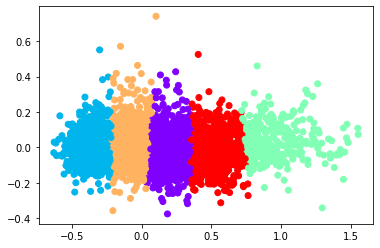

In [15]:
import matplotlib.pyplot as plt

plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow')

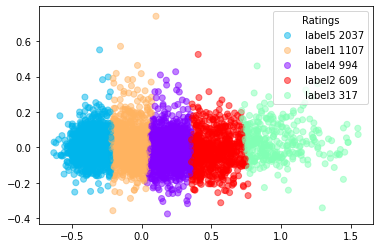

In [16]:
scatter = plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow', alpha=0.5)

# dc = data_cluster
# cc = cluster_colors
# cl = cluster_labels
dc = data['cluster'].value_counts()
dc = -np.sort(-dc)
cc = data['cluster'].value_counts().index.tolist()

cl = []
for i in model.labels:
    cl.append(i.replace('__',''))

handles = scatter.legend_elements(num=cc)[0]  # extract the handles from the existing scatter plot

plt.legend(title='Ratings', handles=handles, labels=[cl[0]+' '+str(dc[0]), cl[1]+' '+str(dc[1]), cl[2]+' '+str(dc[2]), cl[3]+' '+str(dc[3]),  cl[4]+' '+str(dc[4])])

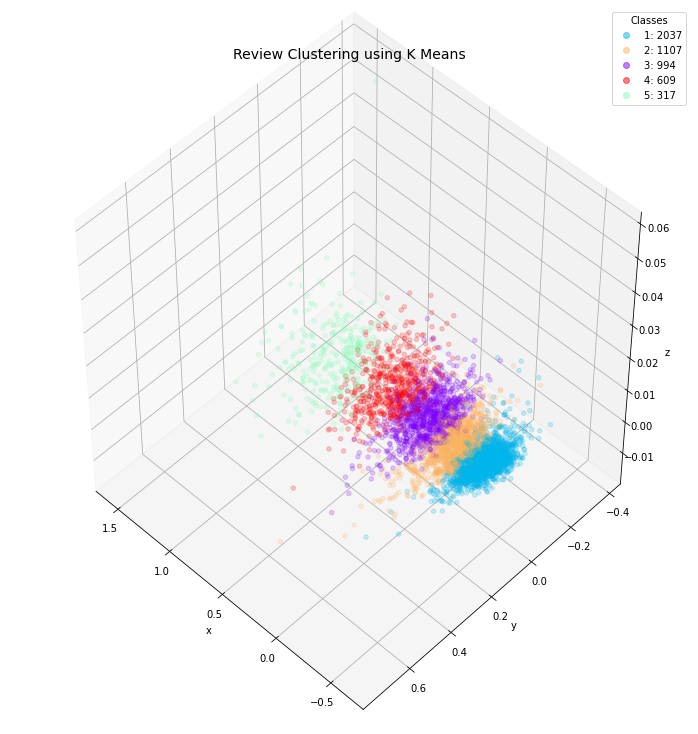

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data['x'],data['y'],data['z'], c=data['cluster'], cmap='rainbow', alpha=0.2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Review Clustering using K Means", fontsize=14)
plt.legend(title='Classes', handles=handles, 
           labels=['1: '+str(dc[0]),
                   '2: '+str(dc[1]),
                   '3: '+str(dc[2]),
                   '4: '+str(dc[3]),
                   '5: '+str(dc[4])])
